## JUMP Dataset Noise Model Creation for MicroSplit

In [1]:
# Import all the things we need further down
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os

from careamics import CAREamist
from careamics.models.lvae.noise_models import GaussianMixtureNoiseModel, create_histogram
from careamics.lvae_training.dataset import DataSplitType
from careamics.config import GaussianMixtureNMConfig, create_n2v_configuration

In [2]:
# Define all available channels - move to dataset specific scripts
class Channels:
    DNA = "DNA"
    Mito = "Mito"
    RNA = "RNA"
    ER = "ER"
    AGP = "AGP"

# List of all channels
ALL_CHANNELS = [Channels.DNA, Channels.Mito, Channels.RNA, Channels.ER, Channels.AGP]

# Load data from your microsplit_dataset created in prepJUMP
def load_data(dataset_dir, channel_names):
    """Load images for each channel from the prepared dataset"""
    all_images = []
    
    for channel in channel_names:
        # Find the channel directory (case-insensitive)
        channel_dir = None
        for dir_name in os.listdir(dataset_dir):
            if dir_name.lower() == channel.lower() and os.path.isdir(os.path.join(dataset_dir, dir_name)):
                channel_dir = os.path.join(dataset_dir, dir_name)
                break
        
        if not channel_dir:
            print(f"Channel directory for '{channel}' not found in {dataset_dir}")
            continue
            
        # Load all tiff files for this channel
        files = sorted([f for f in os.listdir(channel_dir) if f.endswith('.tif')])
        
        # Load each image for this channel
        channel_images = []
        for f in files:
            img = tifffile.imread(os.path.join(channel_dir, f))
            channel_images.append(img)
        
        # Stack images for this channel
        if channel_images:
            channel_images = np.stack(channel_images)
            all_images.append(channel_images)
        else:
            print(f"No images found for channel {channel}")
    
    if not all_images:
        raise ValueError(f"No images loaded for any of the channels: {channel_names}")
        
    return np.stack(all_images, axis=-1)

### We need to create a noise model for each channel included in the dataset, so we need to process each channel individually 



Processing channel: DNA
Using dataset: microsplit_dna_er_dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40-16Q') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


Input data shape: (50, 1080, 1280, 1)


Computed dataset mean: [149.51633751], std: [98.82306665]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/localscratch/mambaforge/envs/microsplit/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/localscratch/mambaforge/envs/microsplit/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/localscratch/mambaforge/envs/microsplit/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

Training noise model for channel DNA
[GaussianMixtureNoiseModel] min_sigma: 200.0
0 4.002293109893799

The trained parameters (noise_model_DNA) is saved at location: noise_models


/home/diya.srivastava/Desktop/repos/MicroSplit-reproducibility/src/microsplit_reproducibility/utils/utils.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noise_model.min_signal = torch.tensor(
/home/diya.srivastava/Desktop/repos/MicroSplit-reproducibility/src/microsplit_reproducibility/utils/utils.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  noise_model.max_signal = torch.tensor(
/home/diya.srivastava/Desktop/repos/MicroSplit-reproducibility/src/microsplit_reproducibility/utils/utils.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(source



Processing channel: Mito
Using dataset: microsplit_er_mito_dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Input data shape: (50, 1080, 1280, 1)


Computed dataset mean: [1458.04253782], std: [1042.8712569]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training noise model for channel Mito
[GaussianMixtureNoiseModel] min_sigma: 200.0
0 11.31328010559082

The trained parameters (noise_model_Mito) is saved at location: noise_models


Processing channel: RNA
Using dataset: microsplit_rna_er_dataset


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Input data shape: (50, 1080, 1280, 1)


Computed dataset mean: [1055.05918613], std: [812.20086668]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training noise model for channel RNA
[GaussianMixtureNoiseModel] min_sigma: 200.0
0 10.021109580993652

The trained parameters (noise_model_RNA) is saved at location: noise_models


Processing channel: ER
Using dataset: microsplit_dna_er_dataset
Input data shape: (50, 1080, 1280, 1)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Computed dataset mean: [651.86528145], std: [445.27847309]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training noise model for channel ER
[GaussianMixtureNoiseModel] min_sigma: 200.0
0 9.352987289428711

The trained parameters (noise_model_ER) is saved at location: noise_models


Processing channel: AGP
Using dataset: microsplit_er_agp_dataset
Input data shape: (50, 1080, 1280, 1)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Computed dataset mean: [303.02090041], std: [160.11920044]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params | Mode 
---------------------------------------
0 | model | UNet | 509 K  | train
---------------------------------------
509 K     Trainable params
0         Non-trainable params
509 K     Total params
2.037     Total estimated model params size (MB)
39        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Training noise model for channel AGP
[GaussianMixtureNoiseModel] min_sigma: 200.0
0 6.002026081085205

The trained parameters (noise_model_AGP) is saved at location: noise_models


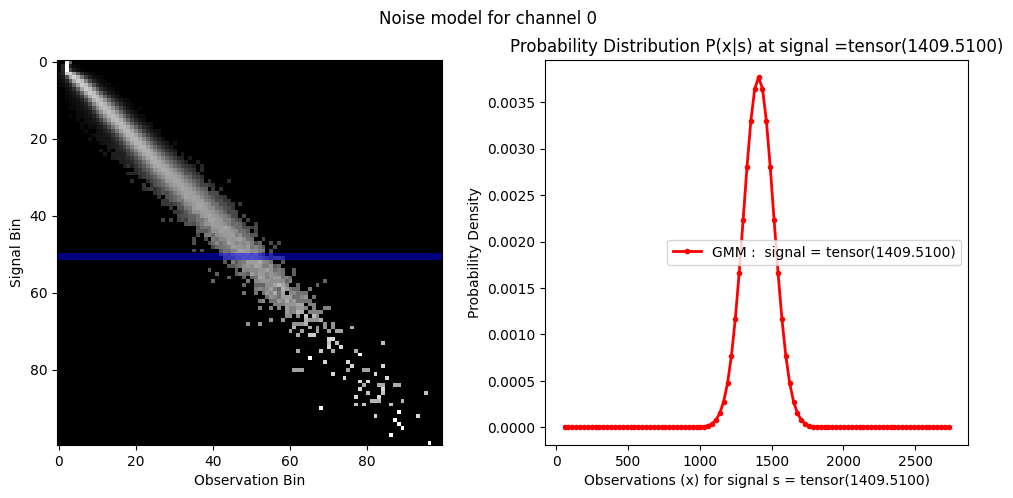

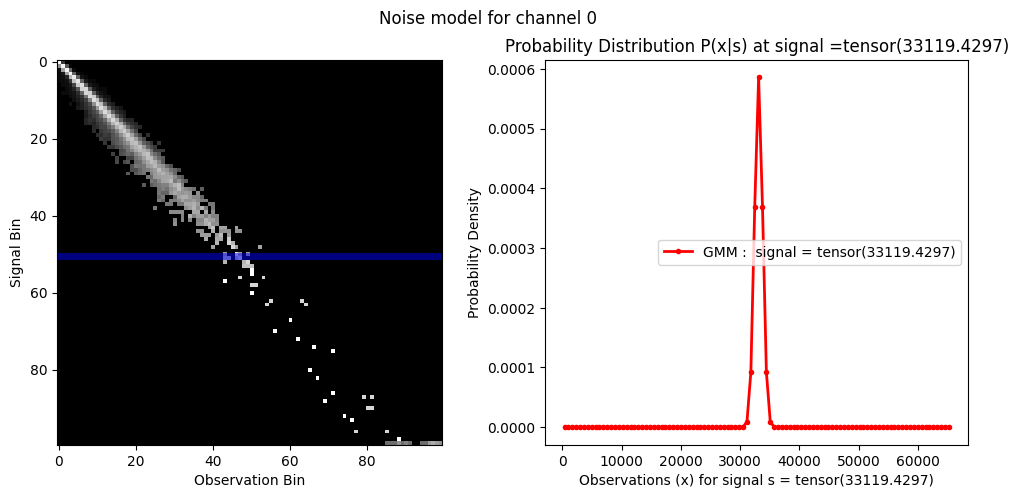

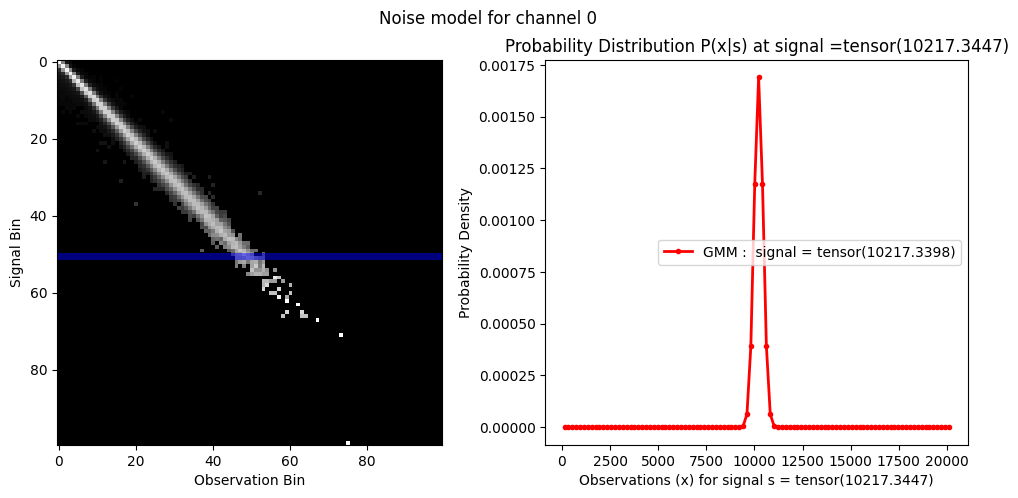

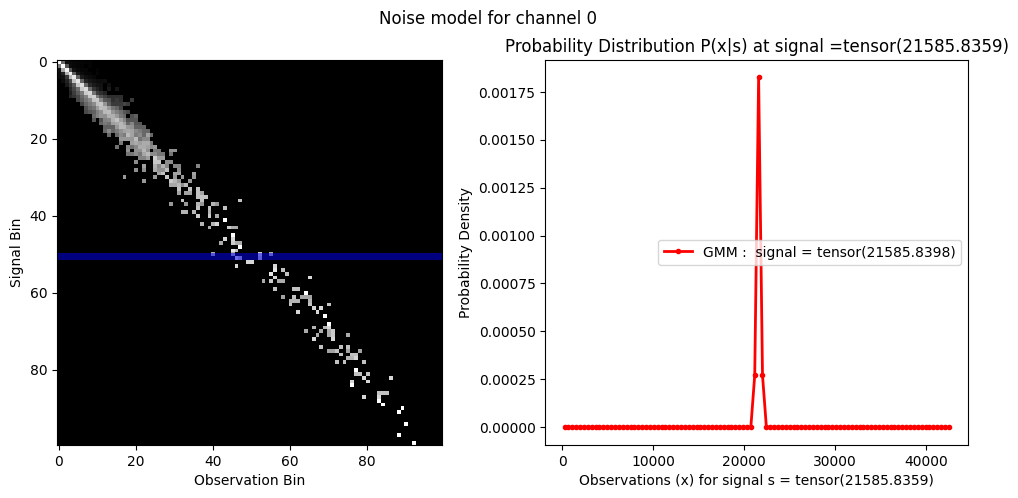

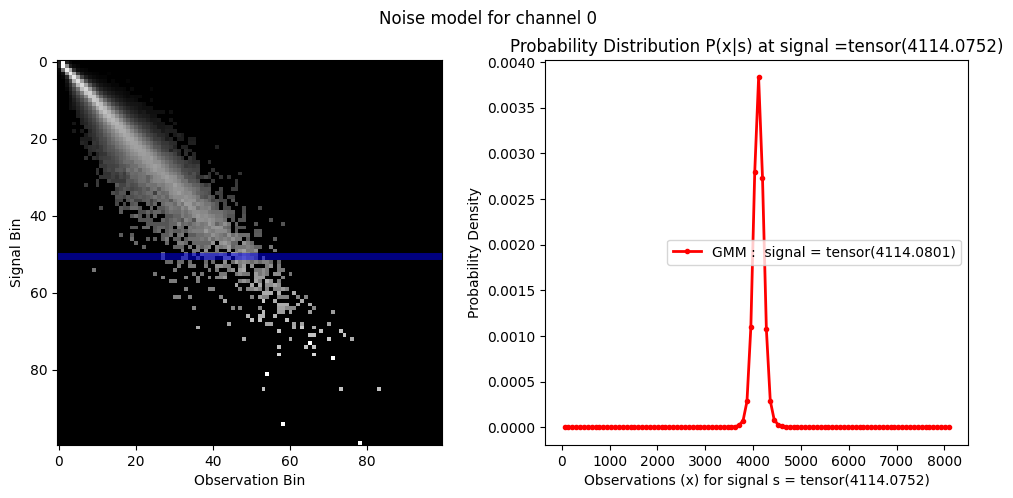

In [3]:
# Process each channel individually
for channel in ALL_CHANNELS:
    print(f"\n\n{'='*50}")
    print(f"Processing channel: {channel}")
    print(f"{'='*50}")
    
    # Find datasets containing this channel
    dataset_dirs = [d for d in os.listdir('.') if d.startswith('microsplit_') 
                   and os.path.isdir(d) and channel.lower() in d.lower()]
    
    if not dataset_dirs:
        print(f"No dataset found containing {channel}")
        continue
        
    dataset_dir = dataset_dirs[0]  
    print(f"Using dataset: {dataset_dir}")
    
    try:
        input_data = load_data(dataset_dir, [channel])
        print(f"Input data shape: {input_data.shape}")
        
        # Train N2V 
        config = create_n2v_configuration(
            experiment_name=f"jump_noise_models_n2v_{channel}",
            data_type="array",
            axes="SYXC", 
            n_channels=1,  # Just one channel at a time
            patch_size=(64, 64),
            batch_size=64,
            num_epochs=10,
        )
        
        # Train N2V on the data
        careamist = CAREamist(source=config, work_dir=f"noise_models_{channel}")
        careamist.train(train_source=input_data, val_minimum_split=5)
        
        # Denoise data with the N2V model
        prediction = careamist.predict(input_data, tile_size=(256, 256))
        
        # Train the Noise Model for this channel
        print(f"Training noise model for channel {channel}")
        channel_data = input_data[..., 0]  # Since we're only loading one channel
        channel_prediction = np.concatenate(prediction)[:, 0]  # Get the denoised channel
        
        noise_model_config = GaussianMixtureNMConfig(
            model_type="GaussianMixtureNoiseModel",
            min_signal=channel_data.min(),
            max_signal=channel_data.max(),
            n_coeff=4,
            n_gaussian=6
        )
        
        noise_model = GaussianMixtureNoiseModel(noise_model_config)
        noise_model.fit(signal=channel_data, observation=channel_prediction, n_epochs=100)
        
        # Save result for later re-use
        noise_model.save(path="noise_models", name=f"noise_model_{channel}")
        
        # Show the result
        histogram = create_histogram(
            bins=100,
            min_val=channel_data.min(),
            max_val=channel_data.max(),
            signal=channel_data,
            observation=channel_prediction
        )
        
        from microsplit_reproducibility.utils.utils import plot_probability_distribution
        plot_probability_distribution(
            noise_model,
            signalBinIndex=50,
            histogram=histogram[0],
            channel=0  # Since we're only using one channel
        )
        
    except Exception as e:
        print(f"Error processing channel {channel}: {str(e)}")